<a href="https://colab.research.google.com/github/ashu433/Machine-Learning-Book-Practice-Q-A/blob/main/Chapter_10_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [2]:
iris=load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
X=iris.data[:,(2,3)]
Y=(iris.target==0)

In [4]:
per_clf=Perceptron()
per_clf.fit(X,Y)

Perceptron()

In [5]:
y_pred=per_clf.predict(X)

In [6]:
y_pred=per_clf.predict([[2,0.5]])

In [7]:
y_pred

array([False])

# **MLP**

# **Example 1**

In [8]:
df=pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df.shape

(10000, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
df.duplicated().sum()

0

In [12]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [13]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [14]:
df.drop(["RowNumber","CustomerId","Surname"],axis=1,inplace=True)

In [15]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [16]:
df=pd.get_dummies(df,columns=["Geography","Gender"],drop_first=True)
encoded_columns = [col for col in df.columns if col.startswith(('Geography_', 'Gender_'))]

# Convert only those columns to integers (0/1)
df[encoded_columns] = df[encoded_columns].astype(int)

In [17]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [18]:
X=df.drop(["Exited"],axis=1)
Y=df['Exited']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=40)

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scale=StandardScaler()
X_train_scaled=scale.fit_transform(X_train)
X_test_scaled=scale.fit_transform(X_test)

In [23]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [24]:
model=Sequential()

model.add(Dense(11,activation="relu",input_dim=11))
model.add(Dense(11,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=['accuracy'])

In [27]:
history=model.fit(X_train_scaled,Y_train,batch_size=32,epochs=50,verbose=1,validation_split=0.2)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6761 - loss: 0.6201 - val_accuracy: 0.8119 - val_loss: 0.4743
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7965 - loss: 0.4797 - val_accuracy: 0.8181 - val_loss: 0.4339
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7973 - loss: 0.4517 - val_accuracy: 0.8281 - val_loss: 0.4111
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8094 - loss: 0.4297 - val_accuracy: 0.8369 - val_loss: 0.3990
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8052 - loss: 0.4278 - val_accuracy: 0.8394 - val_loss: 0.3876
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8194 - loss: 0.4189 - val_accuracy: 0.8419 - val_loss: 0.3758
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8245 - loss: 0.4119 - val_accuracy: 0.8494 - val_loss: 0.3649
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8309 - loss: 0.3900 - val_accuracy: 0.

In [28]:
y_predict=model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


In [29]:
y_predict = (y_predict >= 0.5).astype(int)

In [30]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test,y_predict)

0.87

In [31]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [32]:
import matplotlib.pyplot as plt

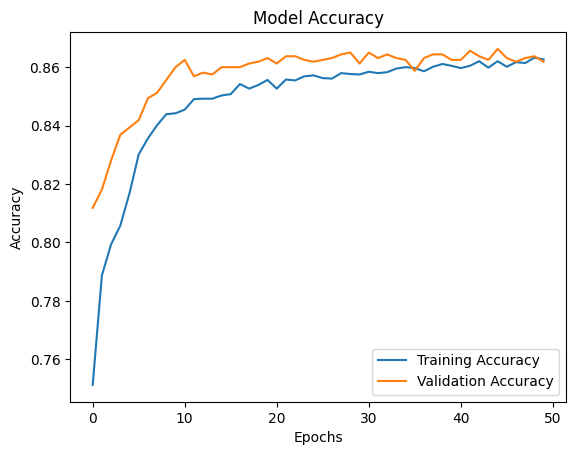

In [33]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

# Add title and labels
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Add a legend
plt.legend()

# Show the plot
plt.show()

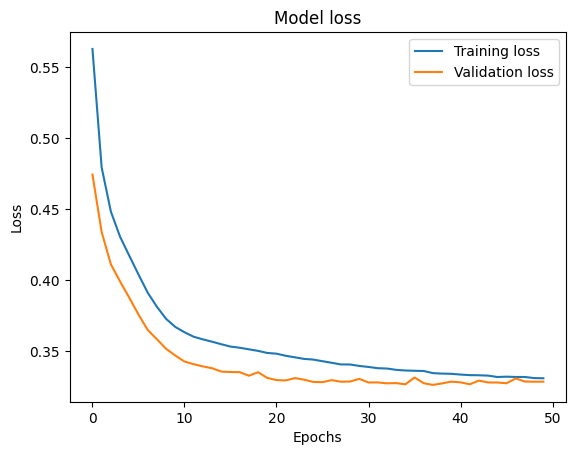

In [34]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')

# Add title and labels
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Add a legend
plt.legend()

# Show the plot
plt.show()

# **Example 2**

In [35]:
Fashion_data=keras.datasets.fashion_mnist

In [36]:
type(Fashion_data)

module

In [37]:
(X_train,Y_train),(X_test,Y_test)=Fashion_data.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [38]:
X_train.shape

(60000, 28, 28)

In [39]:
X_valid,X_train=X_train[:5000]/255.0,X_train[5000:]/255.0

In [40]:
Y_valid,Y_train=Y_train[:5000],Y_train[5000:]

In [41]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [42]:
np.unique(Y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [43]:
model=keras.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [44]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 300)                 │          90,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           3,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 328,810 (1.25 MB)

 Trainable params: 328,810 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense_3, built=True>,
 <Dense name=dense_4, built=True>,
 <Dense name=dense_5, built=True>]

In [46]:
Hidden_Layer_1=model.layers[1]

In [47]:
weights, biases=Hidden_Layer_1.get_weights()

In [48]:
biases.shape

(300,)

In [49]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [50]:
history=model.fit(X_train,Y_train,epochs=50,validation_data=(X_valid,Y_valid))

Epoch 1/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6870 - loss: 0.9845 - val_accuracy: 0.8290 - val_loss: 0.5045
Epoch 2/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8232 - loss: 0.5039 - val_accuracy: 0.8594 - val_loss: 0.4297
Epoch 3/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8428 - loss: 0.4501 - val_accuracy: 0.8566 - val_loss: 0.4192
Epoch 4/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8555 - loss: 0.4160 - val_accuracy: 0.8616 - val_loss: 0.4041
Epoch 5/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8576 - loss: 0.4026 - val_accuracy: 0.8528 - val_loss: 0.4230
Epoch 6/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8635 - loss: 0.3836 - val_accuracy: 0.8710 - val_loss: 0.3725
Epoch 7/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8699 - loss: 0.3680 - val_accuracy: 0.8648 - val_loss: 0.3798
Epoch 8/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8737 - loss: 0.3577 

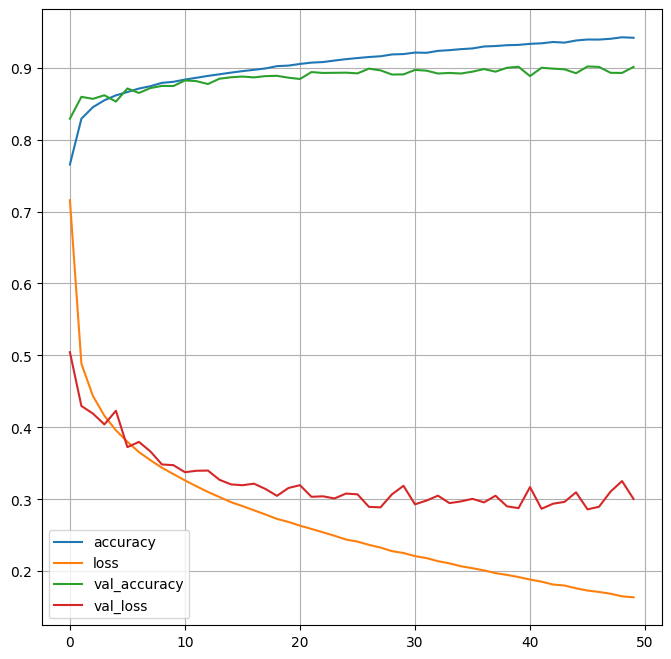

In [51]:
pd.DataFrame(history.history).plot(figsize=(8,8))
plt.grid(True)
plt.show()

In [52]:
model.evaluate(X_test,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8549 - loss: 68.5325


[69.23895263671875, 0.8528000116348267]

In [53]:
X_new=X_test[:3]
Y_predict=model.predict(X_new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


In [54]:
X_new.shape

(3, 28, 28)

In [55]:
Y_predict

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [56]:
Y_classes=np.argmax(Y_predict,axis=1)

In [57]:
np.array(class_names)[Y_classes]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [58]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [59]:
housing=fetch_california_housing()
X_train,X_test,Y_train,Y_test=train_test_split(housing.data,housing.target,random_state=40)

In [60]:
X_train,X_valid,Y_train,Y_valid=train_test_split(X_train,Y_train,random_state=40)

In [61]:
scalar=StandardScaler()
X_train_scaled=scalar.fit_transform(X_train)
X_valid_scaled=scalar.fit_transform(X_valid)
X_test_scaled=scalar.fit_transform(X_test)

In [62]:
X_train_scaled.shape

(11610, 8)

In [63]:
model=keras.models.Sequential([keras.layers.Dense(30,activation="relu",input_shape=X_train_scaled.shape[1:]),keras.layers.Dense(1)])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [64]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 30)                  │             270 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 301 (1.18 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
model.compile(loss="mean_squared_error",optimizer="sgd")

In [66]:
model.fit(X_train_scaled,Y_train,epochs=30,validation_split=0.2)

Epoch 1/30
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3341 - val_loss: 0.6135
Epoch 2/30
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7833 - val_loss: 0.4970
Epoch 3/30
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4824 - val_loss: 0.4710
Epoch 4/30
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4324 - val_loss: 0.4422
Epoch 5/30
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4293 - val_loss: 0.5164
Epoch 6/30
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4153 - val_loss: 0.4263
Epoch 7/30
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4066 - val_loss: 0.4243
Epoch 8/30
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4242 - val_loss: 0.5348
Epoch 9/30
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4063 - val_loss: 0.4054
Epoch 10/30
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3958 - val_loss: 0.4056
Epoch 11/30
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3698 - val_loss: 0.4139
Epoch 12/30
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [67]:
model.evaluate(X_test,Y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 33396.4766


33431.01171875

In [68]:
X_new=X_test[:3]

In [69]:
X_new.shape

(3, 8)

In [70]:
model.predict(X_new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


array([[189.66719],
       [181.50969],
       [172.64105]], dtype=float32)

In [71]:
input_=keras.layers.Input(shape=X_train_scaled.shape[1:])
hidden_1=keras.layers.Dense(30,activation="relu")(input_)
hidden_2=keras.layers.Dense(30,activation="relu")(hidden_1)
concat=keras.layers.Concatenate()([input_,hidden_2])
output=keras.layers.Dense(1)(concat)
model=keras.Model(inputs=[input_],outputs=[output])

In [72]:
model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 8)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_8 (Dense)           │ (None, 30)             │            270 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_9 (Dense)           │ (None, 30)             │            930 │ dense_8[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 38)             │              0 │ input_layer_3[0][0],   │
│                           │                        │                │ dense_9[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_10 (Dense)          │ (None, 1)              │             39 │ concatenate[0][0]      │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,239 (4.84 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 0 (0.00 B)

In [73]:
input_A=keras.layers.Input(shape=[5],name="Wide input")
input_B=keras.layers.Input(shape=[3],name="Deep input")
hidden_1=keras.layers.Dense(30,activation="relu")(input_B)
hidden_2=keras.layers.Dense(30,activation="relu")(hidden_1)
concat=keras.layers.concatenate([input_A,hidden_2])
output=keras.layers.Dense(1)(concat)
model=keras.Model(inputs=[input_A,input_B],outputs=[output])

In [74]:
model.compile(loss="mse",optimizer="sgd")

In [75]:
X_train_scaled.shape

(11610, 8)

In [76]:
X_train_A,X_train_B=X_train_scaled[:,:5],X_train_scaled[:,5:]
X_valid_A,X_valid_B=X_valid_scaled[:,:5],X_valid_scaled[:,5:]
X_test_A,X_test_B=X_test_scaled[:,:5],X_test_scaled[:,5:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [77]:
history=model.fit((X_train_A,X_train_B),Y_train,epochs=50,validation_data=((X_valid_A,X_valid_B),Y_valid))

Epoch 1/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2655 - val_loss: 0.9490
Epoch 2/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5661 - val_loss: 0.4506
Epoch 3/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4433 - val_loss: 0.4412
Epoch 4/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4441 - val_loss: 0.4357
Epoch 5/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4158 - val_loss: 0.4122
Epoch 6/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5039 - val_loss: 0.4013
Epoch 7/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4082 - val_loss: 0.4034
Epoch 8/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3906 - val_loss: 0.3954
Epoch 9/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3802 - val_loss: 0.3811
Epoch 10/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3795 - val_loss: 0.3736
Epoch 11/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3711 - val_loss: 0.4296
Epoch 12/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [78]:
model.evaluate((X_test_A,X_test_B),Y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4212


0.41764676570892334

# **DNN With Two output model**

In [79]:
Input_A=keras.layers.Input(shape=[5],name="Wide input")
Input_B=keras.layers.Input(shape=[3],name="Narrow input")
Hidden_Layer_1=keras.layers.Dense(30,activation="relu")(Input_B)
Hidden_Layer_2=keras.layers.Dense(30,activation="relu")(Hidden_Layer_1)
concat=keras.layers.concatenate([Input_A,Hidden_Layer_2])
main_output=keras.layers.Dense(1,name="Main_Output")(concat)
aux_output=keras.layers.Dense(1,name="Aux_Output")(Hidden_Layer_2)

In [80]:
model=keras.Model(inputs=[Input_A,Input_B],outputs=[main_output,aux_output])

In [81]:
model.compile(loss=["mse","mse"],loss_weights=[0.9,0.1],optimizer="sgd")

In [82]:
history=model.fit([X_train_A,X_train_B],[Y_train,Y_train],epochs=50,validation_data=([X_valid_A,X_valid_B],[Y_valid,Y_valid]))

Epoch 1/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Aux_Output_loss: 2.8037 - Main_Output_loss: 1.3811 - loss: 1.5233 - val_Aux_Output_loss: 1.4270 - val_Main_Output_loss: 0.7091 - val_loss: 0.7809
Epoch 2/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Aux_Output_loss: 1.3849 - Main_Output_loss: 0.7601 - loss: 0.8226 - val_Aux_Output_loss: 1.1079 - val_Main_Output_loss: 0.4738 - val_loss: 0.5372
Epoch 3/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Aux_Output_loss: 1.0589 - Main_Output_loss: 0.4825 - loss: 0.5402 - val_Aux_Output_loss: 1.0130 - val_Main_Output_loss: 0.4383 - val_loss: 0.4958
Epoch 4/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Aux_Output_loss: 0.9417 - Main_Output_loss: 0.4348 - loss: 0.4855 - val_Aux_Output_loss: 0.9558 - val_Main_Output_loss: 0.4173 - val_loss: 0.4712
Epoch 5/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Aux_Output_loss: 0.9210 - Main_Output_loss: 0.4124 - loss: 0.4633 - val_Aux_Output_loss: 0.9256 - val_Main_Output_loss: 0.4119 - val_loss: 0.4633


# **Callback**

In [83]:
model.save("My_first_model.keras")

In [84]:
model_loaded=keras.models.load_model("My_first_model.keras")

In [85]:
model_loaded.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Narrow input (InputLayer) │ (None, 3)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_14 (Dense)          │ (None, 30)             │            120 │ Narrow input[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Wide input (InputLayer)   │ (None, 5)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_15 (Dense)          │ (None, 30)             │            930 │ dense_14[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_2             │ (None, 35)             │              0 │ Wide input[0][0],      │
│ (Concatenate)             │                        │                │ dense_15[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Main_Output (Dense)       │ (None, 1)              │             36 │ concatenate_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Aux_Output (Dense)        │ (None, 1)              │             31 │ dense_15[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,119 (4.38 KB)

 Trainable params: 1,117 (4.36 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [86]:
check_point_call_back=keras.callbacks.ModelCheckpoint("my_model_file.keras")
history=model.fit([X_train_A,X_train_B],[Y_train,Y_train],epochs=10,validation_data=([X_valid_A,X_valid_B],[Y_valid,Y_valid]),callbacks=[check_point_call_back])

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Aux_Output_loss: 0.7148 - Main_Output_loss: 0.3262 - loss: 0.3651 - val_Aux_Output_loss: 0.7606 - val_Main_Output_loss: 0.3543 - val_loss: 0.3950
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Aux_Output_loss: 0.7170 - Main_Output_loss: 0.3409 - loss: 0.3785 - val_Aux_Output_loss: 0.7527 - val_Main_Output_loss: 0.3516 - val_loss: 0.3917
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Aux_Output_loss: 0.7234 - Main_Output_loss: 0.3545 - loss: 0.3914 - val_Aux_Output_loss: 0.7544 - val_Main_Output_loss: 0.3569 - val_loss: 0.3967
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - Aux_Output_loss: 0.7269 - Main_Output_loss: 0.3522 - loss: 0.3897 - val_Aux_Output_loss: 0.7577 - val_Main_Output_loss: 0.3655 - val_loss: 0.4048
Epoch 5/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - Aux_Output_loss: 0.7633 - Main_Output_loss: 0.3673 - loss: 0.4069 - val_Aux_Output_loss: 0.7464 - val_Main_Output_loss: 0.3491 - val_loss: 0.3889


In [87]:
check_point_call_back_early_stopping=keras.callbacks.ModelCheckpoint("my_model_file_early_stopping.keras",save_best_only=True)
history=model.fit([X_train_A,X_train_B],[Y_train,Y_train],epochs=10,validation_data=([X_valid_A,X_valid_B],[Y_valid,Y_valid]),callbacks=[check_point_call_back_early_stopping])

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Aux_Output_loss: 0.7428 - Main_Output_loss: 0.3405 - loss: 0.3807 - val_Aux_Output_loss: 0.7716 - val_Main_Output_loss: 0.3779 - val_loss: 0.4174
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Aux_Output_loss: 0.7108 - Main_Output_loss: 0.3459 - loss: 0.3824 - val_Aux_Output_loss: 0.7564 - val_Main_Output_loss: 0.3687 - val_loss: 0.4075
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - Aux_Output_loss: 0.7276 - Main_Output_loss: 0.3510 - loss: 0.3887 - val_Aux_Output_loss: 0.7514 - val_Main_Output_loss: 0.3727 - val_loss: 0.4106
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - Aux_Output_loss: 0.7316 - Main_Output_loss: 0.3504 - loss: 0.3886 - val_Aux_Output_loss: 0.7448 - val_Main_Output_loss: 0.3600 - val_loss: 0.3985
Epoch 5/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Aux_Output_loss: 0.7119 - Main_Output_loss: 0.3442 - loss: 0.3810 - val_Aux_Output_loss: 0.7597 - val_Main_Output_loss: 0.3716 - val_loss: 0.4105


In [88]:
early_stopping_call_back=keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
history=model.fit([X_train_A,X_train_B],[Y_train,Y_train],epochs=100,validation_data=([X_valid_A,X_valid_B],[Y_valid,Y_valid]),callbacks=[check_point_call_back_early_stopping,early_stopping_call_back])

Epoch 1/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Aux_Output_loss: 0.7061 - Main_Output_loss: 0.3422 - loss: 0.3786 - val_Aux_Output_loss: 0.7500 - val_Main_Output_loss: 0.3601 - val_loss: 0.3992
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - Aux_Output_loss: 0.7155 - Main_Output_loss: 0.3393 - loss: 0.3769 - val_Aux_Output_loss: 0.7391 - val_Main_Output_loss: 0.3501 - val_loss: 0.3891
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Aux_Output_loss: 0.7144 - Main_Output_loss: 0.3373 - loss: 0.3750 - val_Aux_Output_loss: 0.7513 - val_Main_Output_loss: 0.3661 - val_loss: 0.4047
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Aux_Output_loss: 0.7047 - Main_Output_loss: 0.3368 - loss: 0.3736 - val_Aux_Output_loss: 0.7410 - val_Main_Output_loss: 0.3616 - val_loss: 0.3996
Epoch 5/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Aux_Output_loss: 0.7290 - Main_Output_loss: 0.3459 - loss: 0.3842 - val_Aux_Output_loss: 0.7486 - val_Main_Output_loss: 0.3644 - val_loss: 0.

# **Hyperparameter Tuning**

In [89]:
X_train.shape

(11610, 8)

In [114]:
def build_model_DNN(n_hidden_layers=2,number_of_neurons=30,learning_rate=3e-3,input_shape=[8]):
  model=keras.models.Sequential()
  model.add(keras.layers.InputLayer(shape=input_shape))
  for layer in range(n_hidden_layers):
    model.add(keras.layers.Dense(number_of_neurons,activation="relu"))
  model.add(keras.layers.Dense(1))
  optimizer=keras.optimizers.SGD(learning_rate=learning_rate)
  model.compile(loss="mse",optimizer=optimizer)
  return model

In [120]:
!pip install scikeras

In [121]:
from scikeras.wrappers import KerasRegressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [122]:
keras_regression = KerasRegressor(model=build_model_DNN)

In [123]:
keras_regression.fit(X_train_scaled,Y_train,epochs=100,validation_data=(X_valid_scaled,Y_valid),callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0349 - val_loss: 0.6332
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6017 - val_loss: 0.5158
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5035 - val_loss: 0.4613
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4830 - val_loss: 0.4456
Epoch 5/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4324 - val_loss: 0.4281
Epoch 6/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4233 - val_loss: 0.4248
Epoch 7/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4475 - val_loss: 0.4099
Epoch 8/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4053 - val_loss: 0.4043
Epoch 9/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4096 - val_loss: 0.4018
Epoch 10/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3894 - val_loss: 0.4048
Epoch 11/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3955 - val_loss: 0.3896
Epoch 12/100
363/363 ━━━━━━━━━━━━━━━━━━━━

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

KerasRegressor(
	model=<function build_model_DNN at 0x78f520b0e7a0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
)

In [125]:
keras_regression.score(X_test_scaled, Y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


0.6928202033781425

In [129]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal

In [130]:
param_distribs = {
"n_hidden": [0, 1, 2, 3],
"n_neurons": np.arange(1, 100),
"learning_rate": reciprocal(3e-4, 3e-2),
}

In [131]:
rnd_search_cv=RandomizedSearchCV(keras_regression,param_distribs,n_iter=10,cv=3)

In [132]:
rnd_search_cv.fit(X_train_scaled,Y_train,epochs=100,validation_data=(X_valid_scaled,Y_valid),callbacks=[keras.callbacks.EarlyStopping(patience=10)])

AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [134]:
!pip install scikeras --upgrade

In [136]:
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal
import numpy as np
import keras

# ✅ Correct Model Function
def build_model_DNN(n_hidden_layers=2, number_of_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))

    for layer in range(n_hidden_layers):
        model.add(keras.layers.Dense(number_of_neurons, activation="relu"))

    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model


# Wrap the model
keras_regression = KerasRegressor(build_model_DNN)


keras_regression = KerasRegressor(
    model=build_model_DNN,  # ✅ MUST pass like this in scikeras 0.12+
    verbose=1,
    loss="mse",
    optimizer="adam",
    epochs=100,
    batch_size=32
)

# Hyperparameter Space
param_distribs = {
    "model__n_hidden_layers": [1, 2, 3],
    "model__number_of_neurons": np.arange(10, 100),
    "model__learning_rate": reciprocal(3e-4, 3e-2),
}

# Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV

rnd_search_cv = RandomizedSearchCV(
    estimator=keras_regression,
    param_distributions=param_distribs,
    n_iter=10,
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit the model
rnd_search_cv.fit(
    X_train_scaled, Y_train,
    validation_data=(X_valid_scaled, Y_valid),
    callbacks=[keras.callbacks.EarlyStopping(patience=10)]
)


AttributeError: 'super' object has no attribute '__sklearn_tags__'